In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Salary_Data.csv')

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


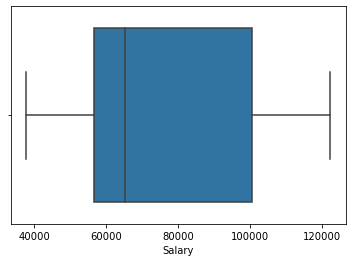

In [4]:
sns.boxplot(dataset['Salary'])
plt.show()

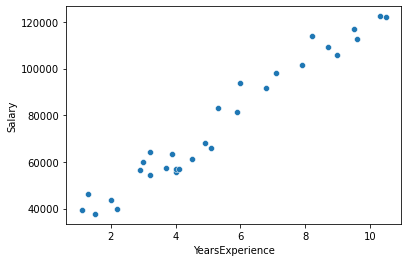

In [5]:
sns.scatterplot(x=dataset['YearsExperience'],y=dataset['Salary'])
plt.show()

In [6]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
dataset.shape

(30, 2)

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [10]:
dataset['Salary'].skew()

0.35411967922959153

# Regression Plot

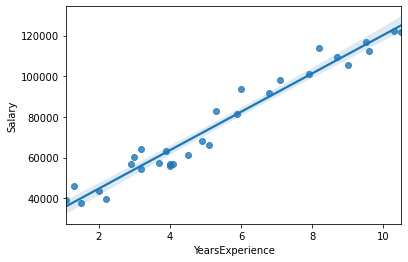

In [11]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary']) #the line come from OLS method
# Best Fit Line (BFT) show in below there
plt.show()

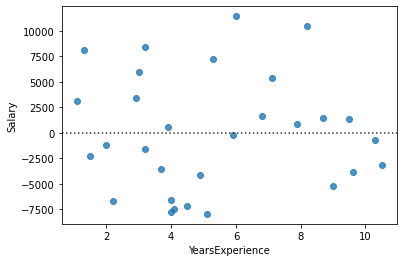

In [12]:
sns.residplot(x=dataset['YearsExperience'],y=dataset['Salary'])
plt.show()
# this is show e=(yi-y^) on salary side

# Train Test Split

In [13]:
x=dataset['YearsExperience']
y=dataset['Salary']


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#it retrun in this order below
# x_train , x_test , y_train , y_test
x_train, x_test, y_train, y_test =train_test_split(x,y,train_size=0.7,random_state=1) # 0.7 means 70% data in train and rest 30% in test


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# all data is 70% of splited data and 30 % testing data

(21,)
(21,)
(9,)
(9,)


# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
#train the model means fit the model

In [20]:
x_test = np.array(x_test)
x_test = x_test.reshape((-1,1))

In [21]:
x_train = np.array(x_train)
x_train = x_train.reshape((-1,1))

In [22]:
#train the model means fit the model
model.fit(x_train,y_train)

LinearRegression()

In [23]:
# y= a + bx

In [24]:
model.intercept_

26049.577715443353

In [25]:
model.coef_

array([9202.23359825])

In [26]:
# y = 26049.57777 + (9202.2336 * x)
# x multply every time

In [27]:
y_predict=model.predict(x_test) # we give them x_test's all values to predict the our y values 
y_predict

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [29]:
r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
MAPE=mean_absolute_percentage_error(y_test,y_predict)
print('R Square value : ',r2)
print('Mean Square Error : ',MSE) 
print('Mean Absolute Percentage Error : ',MAPE) 

R Square value :  0.9248580247217075
Mean Square Error :  39139215.99958858
Mean Absolute Percentage Error :  0.06046677038121748


In [30]:
# print('Actuall data   : ',y_test[-1])
# print('Predicted data : ',y_predict[-1])
print(y_predict)
y_test
# # y_test=np.array(y_test)
# print('actual  : ',y_test[2] ,'\npredict : ',y_predict[2])

[ 74821.41578619  91385.43626305  61938.28874864  81262.97930497
  67459.62890759  88624.76618357 113470.79689886  44454.04491195
 106109.01002026]


17     83088
21     98273
10     63218
19     93940
14     61111
20     91738
26    116969
3      43525
24    109431
Name: Salary, dtype: int64

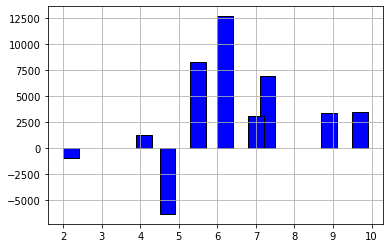

In [31]:
# ei = y-y^  graph plot
# 30% of  y  data
# 30% of  y^ data

ei = y_test-y_predict # it ei = y-y^
x_test=x_test.reshape((-1))
plt.bar(x_test,ei,color='b',edgecolor='k',width=0.4,align='edge')
plt.grid(True)

In [32]:
y_test=np.array(y_test)
actucal_data=y_test[4]
predicted_data=y_predict[4]
print('Actuall data   : ',actucal_data)
print('Predicted data : ',predicted_data)
accuracy_percetange=round((predicted_data-actucal_data)/actucal_data,4)*100
if accuracy_percetange<0:
    print(f'Down graph Accurecy : {100+accuracy_percetange} %')
else:
    print(f'UP graph Accurecy : {100-accuracy_percetange} %')

Actuall data   :  61111
Predicted data :  67459.62890758921
UP graph Accurecy : 89.61 %


In [33]:
for i in range(0,9):
    print(f'Data                : {i+1}')
    actucal_data=y_test[i]
    predicted_data=y_predict[i]
    print('Actuall data        :',actucal_data)
    print('Predicted data      :',round(predicted_data,3))
    print('Error of data       :',round((actucal_data-predicted_data),3))
    accuracy_percetange=round((predicted_data-actucal_data)/actucal_data,4)*100
    if accuracy_percetange<0:
        print(f'Down graph Accurecy : {100+accuracy_percetange} %')
    else:
        print(f'UP graph Accurecy : {100-accuracy_percetange} %')
    print('\n\n**************************************\n')
    

Data                : 1
Actuall data        : 83088
Predicted data      : 74821.416
Error of data       : 8266.584
Down graph Accurecy : 90.05 %


**************************************

Data                : 2
Actuall data        : 98273
Predicted data      : 91385.436
Error of data       : 6887.564
Down graph Accurecy : 92.99 %


**************************************

Data                : 3
Actuall data        : 63218
Predicted data      : 61938.289
Error of data       : 1279.711
Down graph Accurecy : 97.98 %


**************************************

Data                : 4
Actuall data        : 93940
Predicted data      : 81262.979
Error of data       : 12677.021
Down graph Accurecy : 86.51 %


**************************************

Data                : 5
Actuall data        : 61111
Predicted data      : 67459.629
Error of data       : -6348.629
UP graph Accurecy : 89.61 %


**************************************

Data                : 6
Actuall data        : 91738
Predicted dat

In [34]:
y_error=y_test-y_predict
error_data=pd.DataFrame(np.array([y_test,y_predict,y_error])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error'})
error_data

,Actual,Predicted,Error
0,83088.0,74821.415786,8266.584214
1,98273.0,91385.436263,6887.563737
2,63218.0,61938.288749,1279.711251
3,93940.0,81262.979305,12677.020695
4,61111.0,67459.628908,-6348.628908
5,91738.0,88624.766184,3113.233816
6,116969.0,113470.796899,3498.203101
7,43525.0,44454.044912,-929.044912
8,109431.0,106109.010020,3321.989980


In [35]:
# For Show statistics
import statsmodels.api as si
mod=si.OLS(y_train,x_train)
result=mod.fit()

In [36]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              567.3
Date:                Mon, 01 Nov 2021   Prob (F-statistic):                    3.76e-16
Time:                        22:42:23   Log-Likelihood:                         -230.72
No. Observations:                  21   AIC:                                      463.4
Df Residuals:                      20   BIC:                                      464.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
# plt.figure(figsize=(20, 6))
# ax=sns.barplot(x="Predicted", y=[1,2,3,4,5,6,7,8,9], data=error_data)
# ax=sns.barplot(x="Actual", y=[1,2,3,4,5,6,7,8,9], data=error_data)

# ax.set()
# plt.show()


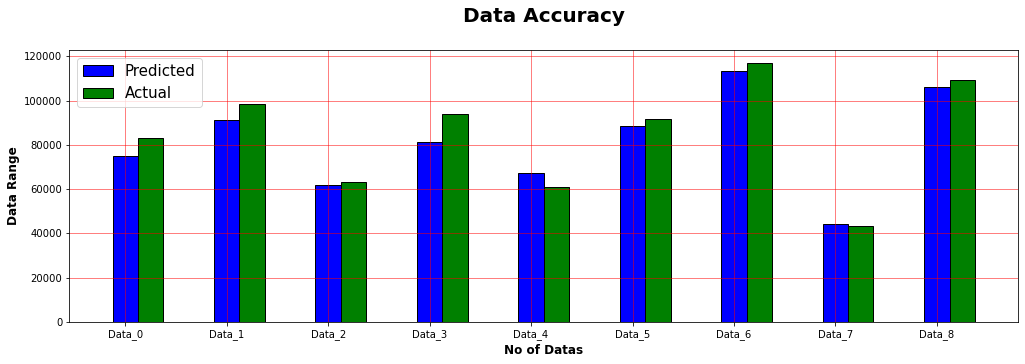

In [38]:
plt.figure(figsize=(17,5))
predicted = list(error_data['Predicted'])
actual = list(error_data['Actual'])

n=9
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'b',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='r', linestyle='-', linewidth=0.5)

# plt.xticks(np.arange(0, 9,step=1))
plt.xticks(np.arange(0, 9, step=1),['Data_0','Data_1','Data_2','Data_3','Data_4','Data_5','Data_6','Data_7','Data_8'])

plt.show()

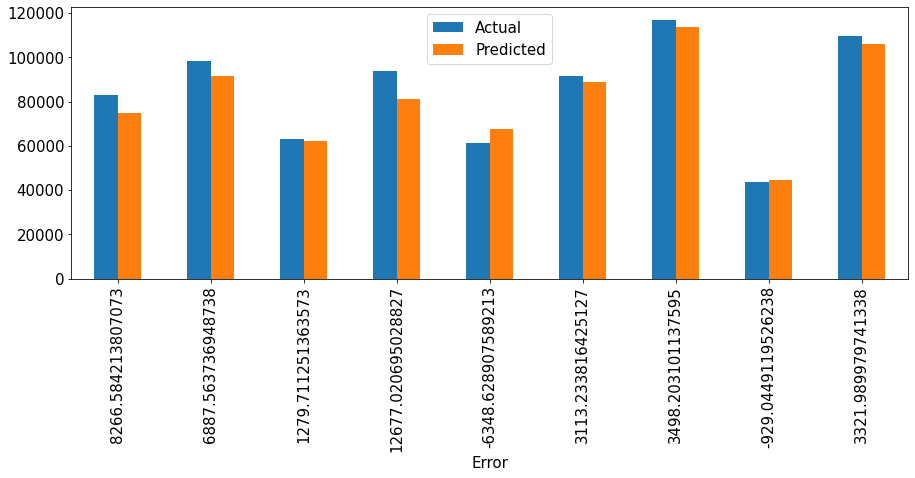

In [43]:
error_data.plot(x='Error',kind='bar',stacked=False,figsize=(15, 5))
plt.rcParams.update({'font.size': 15})